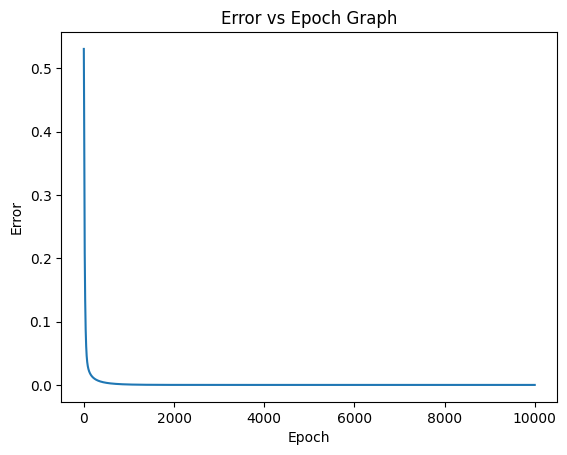

The output of the BPNN model is [[0.05 0.6 ]] with an error of [[-1.25385813e-14  0.00000000e+00]].


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def bpnn(input_data, output_data, hidden_nodes, learning_rate, epochs):
    input_nodes = input_data.shape[1]
    output_nodes = output_data.shape[1]

    # Initialize weights
    weights_ih = np.array([[0.1, 0.25], [0.3, 0.8]])
    weights_ho = np.array([[0.2, 0.4], [0.6, 0.7]])

    # Initialize biases
    bias_ih = np.ones((1, hidden_nodes))
    bias_ho = np.ones((1, output_nodes))

    error_list = []

    for epoch in range(epochs):
        # Forward pass
        hidden_layer = sigmoid(np.dot(input_data, weights_ih) + bias_ih)
        output_layer = sigmoid(np.dot(hidden_layer, weights_ho) + bias_ho)

        # Backward pass
        error = output_data - output_layer
        d_output = error * sigmoid_derivative(output_layer)
        error_hidden = np.dot(d_output, weights_ho.T)
        d_hidden = error_hidden * sigmoid_derivative(hidden_layer)

        # Update weights and biases
        weights_ho += np.dot(hidden_layer.T, d_output) * learning_rate
        bias_ho += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        weights_ih += np.dot(input_data.T, d_hidden) * learning_rate
        bias_ih += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

        # Calculate error
        error_list.append(np.mean(np.abs(error)))
        # print(error_list)

    # Plot error vs epoch graph
    plt.plot(range(epochs), error_list)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Error vs Epoch Graph')
    plt.show()

    return output_layer, error

# Test the function with the given values
input_data = np.array([[0.3, 0.8]])
output_data = np.array([[0.05, 0.6]])
hidden_nodes = 2
learning_rate = 0.5
epochs = 10000

result, error = bpnn(input_data, output_data, hidden_nodes, learning_rate, epochs)
print(f"The output of the BPNN model is {result} with an error of {error}.")
